<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/model_temp_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
feature = pd.read_excel('/content/data_model.xlsx',sheet_name='feature')
label = pd.read_excel('/content/data_model.xlsx',sheet_name='label_30')

In [3]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

In [4]:
feature = norm(feature)

In [5]:
array_y = []
for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y',],axis=1)
  frame = frame.drop(['Vx','Vy'],axis=1)
  frame = norm(frame)
  array_y.append(frame)

In [6]:
! mkdir models
y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LogisticRegression, Ridge, ElasticNet,LassoLars
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(30):
  x = np.array(feature)
  y = np.array(array_y[i])
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.15, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = LassoLars(alpha=0.005)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}',)

mkdir: cannot create directory ‘models’: File exists


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

In [7]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(30):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [8]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [9]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((30,), (30,), (30, 29), (30, 29, 1))

In [10]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

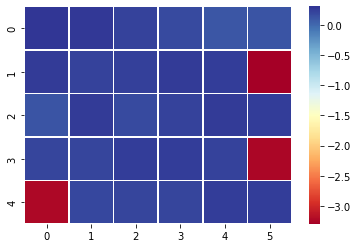

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

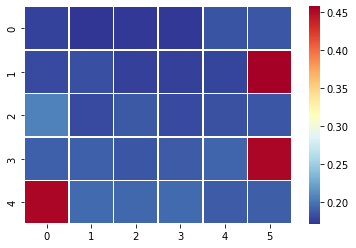

In [12]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

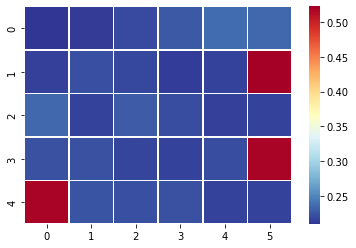

In [13]:
cx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [14]:
scenarios = 2  #0-28
indexing = 0    #0-3 (Vx,Vy,Vz,temp)

In [15]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[...,scenarios]
a = np.array(a)
b = np.array(b)
a = a.reshape(5,6)
b = b.reshape(5,6)
print('reshaped')

reshaped


In [16]:
!zip -r /content/model_30_a0005_norm.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/model 25 (deflated 50%)
  adding: content/models/model 18 (deflated 50%)
  adding: content/models/model 27 (deflated 50%)
  adding: content/models/model 4 (deflated 51%)
  adding: content/models/model 23 (deflated 46%)
  adding: content/models/model 26 (deflated 50%)
  adding: content/models/model 3 (deflated 52%)
  adding: content/models/model 11 (deflated 46%)
  adding: content/models/model 0 (deflated 51%)
  adding: content/models/model 21 (deflated 51%)
  adding: content/models/model 14 (deflated 51%)
  adding: content/models/model 9 (deflated 52%)
  adding: content/models/model 2 (deflated 51%)
  adding: content/models/model 13 (deflated 51%)
  adding: content/models/model 19 (deflated 50%)
  adding: content/models/model 8 (deflated 51%)
  adding: content/models/model 16 (deflated 51%)
  adding: content/models/model 12 (deflated 51%)
  adding: content/models/model 28 (deflated 50%)
  adding: content/models/model 10 (de